##### https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import threading

%matplotlib inline

In [2]:
credit_cards = pd.read_csv('../data/creditcard.csv')

In [3]:
credit_cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_cards.shape

(284807, 31)

In [5]:
credit_cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_cards.Class.unique()

array([0, 1])

In [7]:
total_fraud_count = sum(credit_cards.Class[credit_cards.Class == 1])

In [9]:
print('The total fraud happened is ', total_fraud_count, ' which is', round(total_fraud_count/credit_cards.shape[0] * 100, 4) , '%')

The total fraud happened is  492  which is 0.1727 %


In [10]:
credit_cards[credit_cards.Class == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


### Sample 100 transactions from the whole dataset with random values (2 records from class 1 and 98 records from class 2)

In [12]:
non_fradaulent = credit_cards[credit_cards.Class == 0].sample(98, random_state=1)
fradaulent = credit_cards[credit_cards.Class == 1].sample(2, random_state=1)
sample_credit_cards = pd.concat([non_fradaulent, fradaulent]).sample(100, random_state=1)

In [13]:
sample_credit_cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270173,163950.0,1.720715,-0.503921,-2.139641,0.461606,0.243314,-0.761081,0.329093,-0.254137,1.075456,...,-0.192497,-0.685970,-0.057830,-0.898409,-0.048477,-0.056721,-0.037354,0.004329,187.64,0
190772,128978.0,-1.445784,-1.178168,-0.748132,-0.876898,0.339648,-0.333048,0.045388,0.528629,-1.275845,...,0.302737,0.665329,0.261378,0.262722,-0.336683,-0.089791,0.305151,0.039094,190.00,0
199146,132827.0,-0.259462,1.321876,-0.777527,-0.785693,1.091305,-0.425434,1.010740,-0.161102,0.347279,...,0.259582,1.132633,-0.175459,0.072311,-0.557933,-0.202176,0.716883,0.442168,0.89,0
248602,154010.0,2.028058,-0.160930,-1.225356,0.206776,0.105880,-0.581633,0.043743,-0.119474,0.356058,...,-0.258400,-0.665810,0.284354,-0.474677,-0.303232,0.208856,-0.075027,-0.074485,7.14,0
178103,123475.0,-5.907829,4.495036,-3.682879,-2.626879,-0.198306,3.447705,-2.558034,3.446840,2.201571,...,-0.095417,-0.823894,0.512631,0.608003,0.364096,-0.373512,-1.393714,-0.222022,1.77,0


### Our objective is to find if a transaction is a fraud or not
##### Since there are 32 features, it's better to do a heatmap to see the correation between values of different features

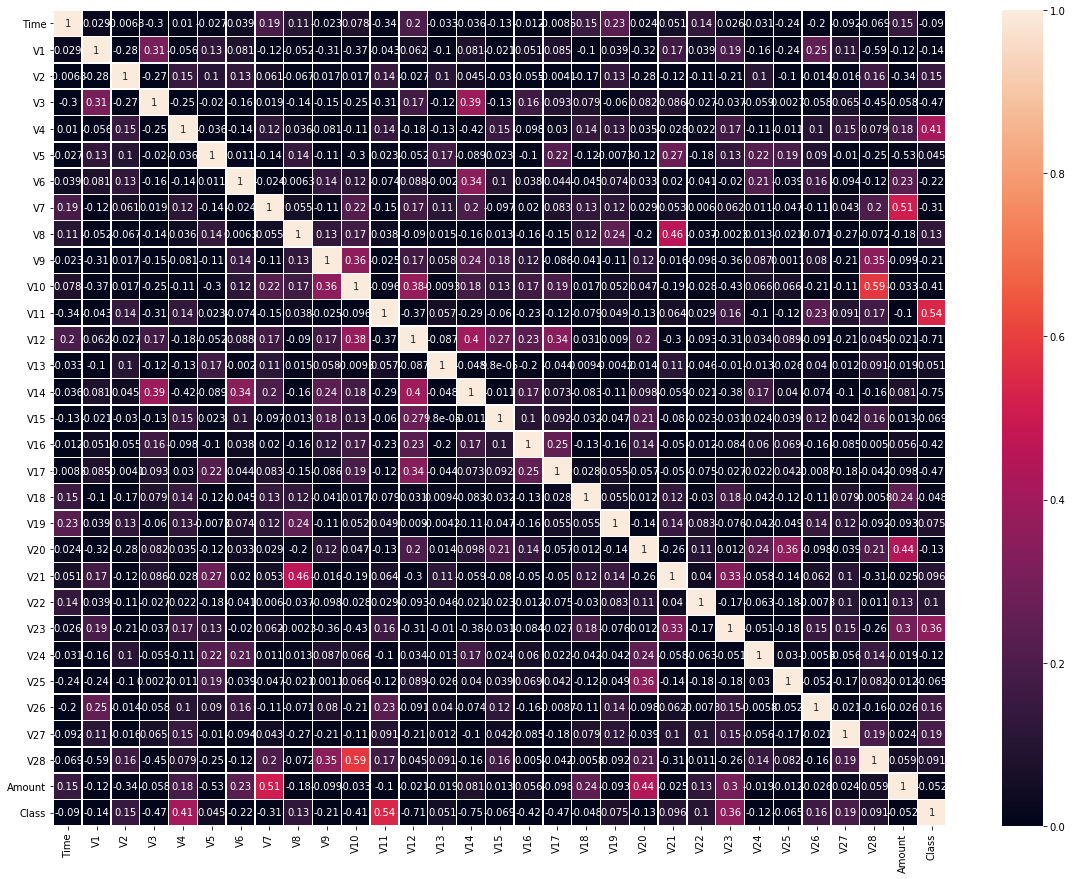

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
corr = sample_credit_cards.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5, ax=ax, vmin=0, vmax=1)

#### The heatmap doesn't show good correlation between values of features.
#### Considering correlation aobe 0.50, we can see that V11 and class are related. V10 and V28, Amount and V7. But the correlation doesn't say much about the fradaulent and non fradaulent transaction.

### Similarity between any two vectors

In [22]:
def cosineSimilarity(vi, vj):
    return np.dot(vi, vj) / (np.linalg.norm(vi) * np.linalg.norm(vj))

In [23]:
class Similarity:
    def __init__(self, inner_id_, class_, innerClass_, similarity_):
        self.inner_id_ = inner_id_
        self.class_ = class_
        self.similarity_ = similarity_
        self.innerClass_ = innerClass_
    
    def __str__(self):
        return 'Class '+ str(int(self.class_))+' matching with id : '+ str(self.inner_id_) +' class '+ str(int(self.innerClass_)) +'. The similarity percent is '+ str(self.similarity_)
    

In [24]:
def __processAllTransactions(similarity_map, row, credit_cards):
    similarity_list = []
    for inner_row in credit_cards.itertuples():
        similarity_percent = cosineSimilarity(row[:-1], inner_row[:-1])
        similarity_list.append(Similarity(inner_row.Index, row.Class, inner_row.Class, similarity_percent))
    similarity_map[row.Index] = similarity_list

In [25]:
%%time
similarity_map = {}
threadlist = []

for row in sample_credit_cards.itertuples():
    t = threading.Thread(target = __processAllTransactions, args=(similarity_map, row, credit_cards))
    threadlist.append(t)
    t.start()

[t.join() for t in threadlist]

CPU times: user 34min 12s, sys: 50min 5s, total: 1h 24min 18s
Wall time: 1h 24min 32s


### Least Similarities

In [29]:
for key, val in similarity_map.items():
    print('Given transaction id : ', key)
    val.sort(key = lambda x : x.similarity_, reverse=False)
    for similar_ in val[:10]:
        print(similar_)

Given transaction id :  216974
Class 0 matching with id : 0 class 0. The similarity percent is 0.005034247977011063
Class 0 matching with id : 2 class 0. The similarity percent is 0.010902676625328485
Class 0 matching with id : 3 class 0. The similarity percent is 0.02979447195593817
Class 0 matching with id : 51 class 0. The similarity percent is 0.049446912559823274
Class 0 matching with id : 164 class 0. The similarity percent is 0.055548555775697166
Class 0 matching with id : 4 class 0. The similarity percent is 0.0683062497758622
Class 0 matching with id : 89 class 0. The similarity percent is 0.09810167074397771
Class 0 matching with id : 20 class 0. The similarity percent is 0.11430859769856744
Class 0 matching with id : 8 class 0. The similarity percent is 0.11698804305013889
Class 0 matching with id : 12 class 0. The similarity percent is 0.13151345254555485
Given transaction id :  177969
Class 0 matching with id : 0 class 0. The similarity percent is 0.0008700366764653784
Cla

Class 0 matching with id : 0 class 0. The similarity percent is 0.0006750984241579069
Class 0 matching with id : 2 class 0. The similarity percent is 0.00654836675957015
Class 0 matching with id : 3 class 0. The similarity percent is 0.025493519025526695
Class 0 matching with id : 51 class 0. The similarity percent is 0.045074232371333546
Class 0 matching with id : 164 class 0. The similarity percent is 0.05119884233311371
Class 0 matching with id : 4 class 0. The similarity percent is 0.06402050756125374
Class 0 matching with id : 89 class 0. The similarity percent is 0.09374958944421292
Class 0 matching with id : 20 class 0. The similarity percent is 0.10987693916851661
Class 0 matching with id : 8 class 0. The similarity percent is 0.11251676732771199
Class 0 matching with id : 12 class 0. The similarity percent is 0.12705522909351397
Given transaction id :  248605
Class 0 matching with id : 0 class 0. The similarity percent is 0.0012828276801447427
Class 0 matching with id : 2 clas

Class 0 matching with id : 0 class 0. The similarity percent is 6.499269941459579e-06
Class 0 matching with id : 2 class 0. The similarity percent is 0.005878626849488806
Class 0 matching with id : 3 class 0. The similarity percent is 0.02481473571492154
Class 0 matching with id : 51 class 0. The similarity percent is 0.044409733371951435
Class 0 matching with id : 164 class 0. The similarity percent is 0.050530368228120584
Class 0 matching with id : 4 class 0. The similarity percent is 0.06334253931186254
Class 0 matching with id : 89 class 0. The similarity percent is 0.09308663199460654
Class 0 matching with id : 20 class 0. The similarity percent is 0.10923252035189675
Class 0 matching with id : 8 class 0. The similarity percent is 0.11188257289588031
Class 0 matching with id : 12 class 0. The similarity percent is 0.1264201746413579
Given transaction id :  7282
Class 0 matching with id : 0 class 0. The similarity percent is 0.0007656831176282608
Class 0 matching with id : 2 class 

Class 0 matching with id : 0 class 0. The similarity percent is 0.00014730597871196458
Class 0 matching with id : 2 class 0. The similarity percent is 0.0060321436261963944
Class 0 matching with id : 3 class 0. The similarity percent is 0.025094408882410782
Class 0 matching with id : 51 class 0. The similarity percent is 0.04449012018064188
Class 0 matching with id : 164 class 0. The similarity percent is 0.05066598478851371
Class 0 matching with id : 4 class 0. The similarity percent is 0.06362104306311503
Class 0 matching with id : 89 class 0. The similarity percent is 0.09316415442467044
Class 0 matching with id : 20 class 0. The similarity percent is 0.1090701620604941
Class 0 matching with id : 8 class 0. The similarity percent is 0.11159563807010522
Class 0 matching with id : 12 class 0. The similarity percent is 0.12614990000558313
Given transaction id :  15213
Class 0 matching with id : 0 class 0. The similarity percent is 0.00040946531761197185
Class 0 matching with id : 2 cla

Class 0 matching with id : 0 class 0. The similarity percent is 0.0009112257176513912
Class 0 matching with id : 2 class 0. The similarity percent is 0.0067730030840199695
Class 0 matching with id : 3 class 0. The similarity percent is 0.02562032155812542
Class 0 matching with id : 51 class 0. The similarity percent is 0.04533964555573954
Class 0 matching with id : 164 class 0. The similarity percent is 0.05142196086858187
Class 0 matching with id : 4 class 0. The similarity percent is 0.06413576696152375
Class 0 matching with id : 89 class 0. The similarity percent is 0.09400058450662267
Class 0 matching with id : 20 class 0. The similarity percent is 0.11029690716606601
Class 0 matching with id : 8 class 0. The similarity percent is 0.11302649516364267
Class 0 matching with id : 12 class 0. The similarity percent is 0.1275472013339368
Given transaction id :  84984
Class 0 matching with id : 0 class 0. The similarity percent is 0.00014351638175351514
Class 0 matching with id : 2 class

Class 0 matching with id : 0 class 0. The similarity percent is 1.776598582635781e-05
Class 0 matching with id : 2 class 0. The similarity percent is 0.0058524991082020555
Class 0 matching with id : 3 class 0. The similarity percent is 0.024490570190476152
Class 0 matching with id : 51 class 0. The similarity percent is 0.04446848414496589
Class 0 matching with id : 164 class 0. The similarity percent is 0.05046233678942817
Class 0 matching with id : 4 class 0. The similarity percent is 0.06295232347272796
Class 0 matching with id : 89 class 0. The similarity percent is 0.09306408969724408
Class 0 matching with id : 20 class 0. The similarity percent is 0.10968390168127312
Class 0 matching with id : 8 class 0. The similarity percent is 0.11259049708483396
Class 0 matching with id : 12 class 0. The similarity percent is 0.12706619290142127
Given transaction id :  120218
Class 0 matching with id : 0 class 0. The similarity percent is 0.00012528725538195454
Class 0 matching with id : 2 cl

Class 0 matching with id : 0 class 0. The similarity percent is 0.0011846021273623575
Class 0 matching with id : 2 class 0. The similarity percent is 0.007053452499872079
Class 0 matching with id : 3 class 0. The similarity percent is 0.025958973783534133
Class 0 matching with id : 51 class 0. The similarity percent is 0.04559698812119281
Class 0 matching with id : 164 class 0. The similarity percent is 0.05170441986720487
Class 0 matching with id : 4 class 0. The similarity percent is 0.0644813487621922
Class 0 matching with id : 89 class 0. The similarity percent is 0.09426676705334963
Class 0 matching with id : 20 class 0. The similarity percent is 0.11046308446458317
Class 0 matching with id : 8 class 0. The similarity percent is 0.11313865757305462
Class 0 matching with id : 12 class 0. The similarity percent is 0.12767021949461904
Given transaction id :  236903
Class 0 matching with id : 0 class 0. The similarity percent is 2.439282971397754e-06
Class 0 matching with id : 2 class

Class 0 matching with id : 0 class 0. The similarity percent is 0.250512637355244
Class 0 matching with id : 2 class 0. The similarity percent is 0.25612920311967696
Class 0 matching with id : 3 class 0. The similarity percent is 0.27426595711716817
Class 0 matching with id : 51 class 0. The similarity percent is 0.2932378935208597
Class 0 matching with id : 164 class 0. The similarity percent is 0.2990280426319286
Class 0 matching with id : 4 class 0. The similarity percent is 0.3109206964531786
Class 0 matching with id : 89 class 0. The similarity percent is 0.339477642610814
Class 0 matching with id : 20 class 0. The similarity percent is 0.3549038338894379
Class 0 matching with id : 8 class 0. The similarity percent is 0.3571378788115079
Class 0 matching with id : 12 class 0. The similarity percent is 0.3708408478684365
Given transaction id :  118124
Class 0 matching with id : 0 class 0. The similarity percent is 3.196410915956258e-05
Class 0 matching with id : 2 class 0. The simil

Class 0 matching with id : 0 class 0. The similarity percent is 0.001345609544325347
Class 0 matching with id : 2 class 0. The similarity percent is 0.007191752168533291
Class 0 matching with id : 3 class 0. The similarity percent is 0.02590896104475728
Class 0 matching with id : 51 class 0. The similarity percent is 0.0457936177027298
Class 0 matching with id : 164 class 0. The similarity percent is 0.051820695726759076
Class 0 matching with id : 4 class 0. The similarity percent is 0.06439264366006578
Class 0 matching with id : 89 class 0. The similarity percent is 0.09441647908296073
Class 0 matching with id : 20 class 0. The similarity percent is 0.11091716807460274
Class 0 matching with id : 8 class 0. The similarity percent is 0.11375676844346802
Class 0 matching with id : 12 class 0. The similarity percent is 0.12825096745186534
Given transaction id :  166655
Class 0 matching with id : 0 class 0. The similarity percent is 0.0024222294037246077
Class 0 matching with id : 2 class 

### Most Similarities

In [30]:
for key, val in similarity_map.items():
    print('Given transaction id : ', key)
    val.sort(key = lambda x : x.similarity_, reverse=True)
    for similar_ in val[:10]:
        print(similar_)

Given transaction id :  216974
Class 0 matching with id : 216974 class 0. The similarity percent is 0.9999999999999999
Class 0 matching with id : 216884 class 0. The similarity percent is 0.9999999918116852
Class 0 matching with id : 216985 class 0. The similarity percent is 0.9999999494749792
Class 0 matching with id : 153594 class 0. The similarity percent is 0.9999999012010902
Class 0 matching with id : 111364 class 0. The similarity percent is 0.9999998996468414
Class 0 matching with id : 111413 class 0. The similarity percent is 0.9999998956703627
Class 0 matching with id : 217528 class 0. The similarity percent is 0.9999998819532281
Class 0 matching with id : 217533 class 0. The similarity percent is 0.9999998302434154
Class 0 matching with id : 216097 class 0. The similarity percent is 0.9999997669773191
Class 0 matching with id : 110860 class 0. The similarity percent is 0.9999997529091487
Given transaction id :  177969
Class 0 matching with id : 177969 class 0. The similarity 

Class 0 matching with id : 122312 class 0. The similarity percent is 0.9999999999999998
Class 0 matching with id : 241438 class 0. The similarity percent is 0.9999999986437546
Class 0 matching with id : 241494 class 0. The similarity percent is 0.9999999975275681
Class 0 matching with id : 151055 class 0. The similarity percent is 0.9999999964646392
Class 0 matching with id : 122361 class 0. The similarity percent is 0.9999999953772288
Class 0 matching with id : 241300 class 0. The similarity percent is 0.9999999948876785
Class 0 matching with id : 241369 class 0. The similarity percent is 0.999999994313768
Class 0 matching with id : 241359 class 0. The similarity percent is 0.9999999938786233
Class 0 matching with id : 241521 class 0. The similarity percent is 0.9999999935337912
Class 0 matching with id : 122413 class 0. The similarity percent is 0.9999999916581654
Given transaction id :  229323
Class 0 matching with id : 229323 class 0. The similarity percent is 0.9999999999999998
Cl

Class 0 matching with id : 7282 class 0. The similarity percent is 1.0
Class 0 matching with id : 8291 class 0. The similarity percent is 0.9999999181897247
Class 0 matching with id : 7285 class 0. The similarity percent is 0.9999999100101915
Class 0 matching with id : 8300 class 0. The similarity percent is 0.9999998980334102
Class 0 matching with id : 8342 class 0. The similarity percent is 0.9999998927831479
Class 0 matching with id : 25086 class 0. The similarity percent is 0.9999998914021616
Class 0 matching with id : 8366 class 0. The similarity percent is 0.9999998872845003
Class 0 matching with id : 8293 class 0. The similarity percent is 0.9999998850093665
Class 0 matching with id : 8340 class 0. The similarity percent is 0.9999998845687945
Class 0 matching with id : 7281 class 0. The similarity percent is 0.9999998762097351
Given transaction id :  195360
Class 0 matching with id : 195360 class 0. The similarity percent is 0.9999999999999999
Class 0 matching with id : 195358 c

Class 0 matching with id : 284321 class 0. The similarity percent is 1.0
Class 0 matching with id : 271851 class 0. The similarity percent is 0.9999999998778811
Class 0 matching with id : 271779 class 0. The similarity percent is 0.9999999998674647
Class 0 matching with id : 271799 class 0. The similarity percent is 0.9999999998405174
Class 0 matching with id : 271790 class 0. The similarity percent is 0.9999999998275189
Class 0 matching with id : 271819 class 0. The similarity percent is 0.9999999998065232
Class 0 matching with id : 271842 class 0. The similarity percent is 0.9999999997985308
Class 0 matching with id : 284310 class 0. The similarity percent is 0.9999999997563459
Class 0 matching with id : 271838 class 0. The similarity percent is 0.9999999997531227
Class 0 matching with id : 271775 class 0. The similarity percent is 0.9999999997201405
Given transaction id :  15213
Class 0 matching with id : 15213 class 0. The similarity percent is 0.9999999999999999
Class 0 matching w

Class 0 matching with id : 84984 class 0. The similarity percent is 1.0000000000000002
Class 0 matching with id : 84988 class 0. The similarity percent is 0.9999999990365158
Class 0 matching with id : 84994 class 0. The similarity percent is 0.9999999989320641
Class 0 matching with id : 84974 class 0. The similarity percent is 0.9999999988434375
Class 0 matching with id : 85006 class 0. The similarity percent is 0.9999999981833538
Class 0 matching with id : 84965 class 0. The similarity percent is 0.9999999980426808
Class 0 matching with id : 84969 class 0. The similarity percent is 0.9999999970354322
Class 0 matching with id : 84960 class 0. The similarity percent is 0.9999999969808837
Class 0 matching with id : 84978 class 0. The similarity percent is 0.9999999969044706
Class 0 matching with id : 85010 class 0. The similarity percent is 0.9999999967901794
Given transaction id :  258846
Class 0 matching with id : 258846 class 0. The similarity percent is 0.9999999999999999
Class 0 mat

Class 0 matching with id : 7230 class 0. The similarity percent is 0.9999999999999998
Class 0 matching with id : 7235 class 0. The similarity percent is 0.9999999370676709
Class 0 matching with id : 25515 class 0. The similarity percent is 0.9999998732138687
Class 0 matching with id : 25498 class 0. The similarity percent is 0.9999998538373427
Class 0 matching with id : 25486 class 0. The similarity percent is 0.99999976361789
Class 0 matching with id : 25479 class 0. The similarity percent is 0.9999997282785845
Class 0 matching with id : 25520 class 0. The similarity percent is 0.9999997159022498
Class 0 matching with id : 25451 class 0. The similarity percent is 0.9999996843627593
Class 0 matching with id : 25542 class 0. The similarity percent is 0.9999996293166354
Class 0 matching with id : 25441 class 0. The similarity percent is 0.9999995418844013
Given transaction id :  135193
Class 0 matching with id : 135193 class 0. The similarity percent is 1.0000000000000002
Class 0 matchin

Class 0 matching with id : 236903 class 0. The similarity percent is 1.0
Class 0 matching with id : 236888 class 0. The similarity percent is 0.9999999999118705
Class 0 matching with id : 236882 class 0. The similarity percent is 0.9999999997291507
Class 0 matching with id : 236948 class 0. The similarity percent is 0.9999999996540982
Class 0 matching with id : 236869 class 0. The similarity percent is 0.9999999996394336
Class 0 matching with id : 236837 class 0. The similarity percent is 0.9999999996323772
Class 0 matching with id : 236898 class 0. The similarity percent is 0.9999999996239507
Class 0 matching with id : 236862 class 0. The similarity percent is 0.9999999996202145
Class 0 matching with id : 236875 class 0. The similarity percent is 0.9999999996171876
Class 0 matching with id : 236874 class 0. The similarity percent is 0.9999999996123399
Given transaction id :  75750
Class 0 matching with id : 75750 class 0. The similarity percent is 1.0
Class 0 matching with id : 75761 

Class 0 matching with id : 229 class 0. The similarity percent is 1.0000000000000002
Class 0 matching with id : 73 class 0. The similarity percent is 0.9995740487020398
Class 0 matching with id : 175 class 0. The similarity percent is 0.9995593306194549
Class 0 matching with id : 251 class 0. The similarity percent is 0.9995422227316264
Class 0 matching with id : 208 class 0. The similarity percent is 0.9994909878960527
Class 0 matching with id : 293 class 0. The similarity percent is 0.9994377543946893
Class 0 matching with id : 266 class 0. The similarity percent is 0.9993975670118085
Class 0 matching with id : 260 class 0. The similarity percent is 0.9993788285799076
Class 0 matching with id : 92 class 0. The similarity percent is 0.9993652991878683
Class 0 matching with id : 432 class 0. The similarity percent is 0.9992530432299511
Given transaction id :  118124
Class 0 matching with id : 118124 class 0. The similarity percent is 0.9999999999999998
Class 0 matching with id : 230926

Class 0 matching with id : 179643 class 0. The similarity percent is 1.0000000000000002
Class 0 matching with id : 92582 class 0. The similarity percent is 0.9999999989880889
Class 0 matching with id : 179686 class 0. The similarity percent is 0.9999999968028747
Class 0 matching with id : 92631 class 0. The similarity percent is 0.9999999966253044
Class 0 matching with id : 92563 class 0. The similarity percent is 0.9999999964298044
Class 0 matching with id : 179561 class 0. The similarity percent is 0.9999999956804443
Class 0 matching with id : 92656 class 0. The similarity percent is 0.9999999948065054
Class 0 matching with id : 179759 class 0. The similarity percent is 0.999999993533312
Class 0 matching with id : 92654 class 0. The similarity percent is 0.9999999917529397
Class 0 matching with id : 92535 class 0. The similarity percent is 0.9999999915179754
Given transaction id :  166655
Class 0 matching with id : 166655 class 0. The similarity percent is 1.0000000000000002
Class 0 